In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [2]:
# Read in data into a dataframe 
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
# Display top of dataframe
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [3]:
# See the column data types and non-missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [4]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(train)

Your selected dataframe has 23 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
travel_with,1114,23.2
most_impressing,313,6.5
total_male,5,0.1
total_female,3,0.1


In [7]:
missing_values_table(test)

Your selected dataframe has 22 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
travel_with,327,20.4
most_impressing,111,6.9
total_male,2,0.1
total_female,1,0.1


In [8]:
# Handling the missing values by filling 'None' throughout all instances
train.travel_with.fillna('None',inplace=True)
train.most_impressing.fillna('None',inplace=True)
# Handling the missing values by filling through the mean value of the entire column
train.total_female.fillna(train.total_female.mean(),inplace = True)
train.total_male.fillna(train.total_male.mean(),inplace = True)

In [9]:
# Handling the missing values by filling 'None' throughout all instances
test.travel_with.fillna('None',inplace=True)
test.most_impressing.fillna('None',inplace=True)
# Handling the missing values by filling through the mean value of the entire column
test.total_female.fillna(test.total_female.mean(),inplace = True)
test.total_male.fillna(test.total_male.mean(),inplace = True)

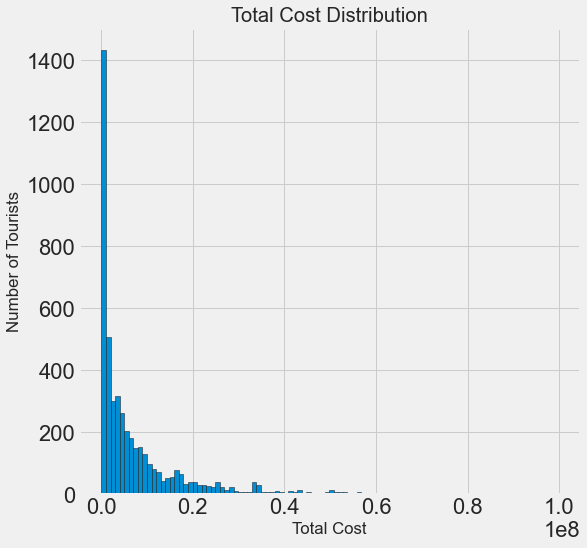

In [10]:
#EDA
figsize(8, 8)


plt.style.use('fivethirtyeight')
plt.hist(train['total_cost'], bins = 100, edgecolor = 'k')
plt.xlabel('Total Cost'); plt.ylabel('Number of Tourists'); plt.title('Total Cost Distribution');


In [11]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.287840,1.138273,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [12]:
train['total_female'] = train['total_female'].astype(int)
train['total_male'] = train['total_male'].astype(int)
train['night_mainland'] = train['night_mainland'].astype(int)
train['night_zanzibar'] = train['night_zanzibar'].astype(int)


test['total_female'] = test['total_female'].astype(int)
test['total_male'] = test['total_male'].astype(int)
test['night_mainland'] = test['night_mainland'].astype(int)
test['night_zanzibar'] = test['night_zanzibar'].astype(int)


In [13]:
train['total_female'].value_counts()

1     2418
0     1672
2      463
3      144
4       46
5       25
6       15
7       10
10       4
9        4
12       3
11       3
15       1
49       1
Name: total_female, dtype: int64

In [14]:
train['total_male'].value_counts()

1     2966
0     1137
2      478
3      139
4       46
6       17
5       15
15       2
7        2
10       2
9        2
17       1
12       1
44       1
Name: total_male, dtype: int64

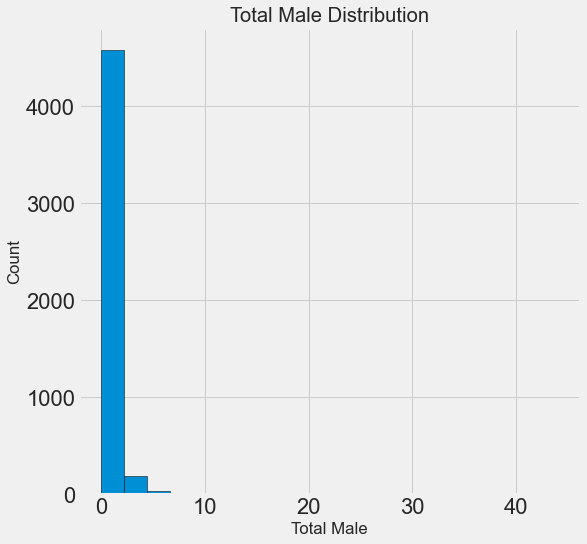

In [15]:

figsize(8, 8)
plt.hist(train['total_male'], bins = 20, edgecolor = 'black');
plt.xlabel('Total Male'); 
plt.ylabel('Count'); plt.title('Total Male Distribution');

In [16]:
train['total_male'].describe()

count    4809.000000
mean        1.009565
std         1.138273
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        44.000000
Name: total_male, dtype: float64

In [17]:

train.loc[train['total_male'] == 44, :]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
2983,tour_4627,KENYA,25-44,Children,49,44,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,Excellent Experience,26332020.0


In [18]:
test['total_male'].sort_values().tail(10)

299      5
201      5
490      6
1291     6
1521     7
1450     7
353      7
1304     7
172     10
1169    40
Name: total_male, dtype: int32

In [19]:
train['total_female'].sort_values().tail(10)

3984    10
1246    10
504     11
4568    11
1732    11
1808    12
1042    12
246     12
1138    15
2983    49
Name: total_female, dtype: int32

In [20]:
test['total_female'].sort_values().tail(10)

215      7
491      7
1521     7
127      9
193     10
172     10
514     11
239     11
1169    12
531     20
Name: total_female, dtype: int32

In [21]:
train.loc[train['total_male'] == 44, :]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
2983,tour_4627,KENYA,25-44,Children,49,44,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,Excellent Experience,26332020.0


In [22]:
test.loc[test['total_male'] == 40, :]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
1169,tour_5278,KENYA,45-64,Friends/Relatives,12,40,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,0,3,Cash,Yes,Wildlife


In [23]:

train.loc[train['total_female'] == 49, :]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
2983,tour_4627,KENYA,25-44,Children,49,44,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,Excellent Experience,26332020.0


In [24]:
train.shape,test.shape

((4809, 23), (1601, 22))

In [25]:
train.drop(index=2983,inplace=True)
test.drop(index=1169,inplace=True)

train.shape,test.shape

((4808, 23), (1600, 22))

In [26]:
# Find all correlations and sort 
correlations_data = train.corr()['total_cost'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')



night_mainland    0.020612
night_zanzibar    0.145346
total_male        0.206281
total_female      0.325958
total_cost        1.000000
Name: total_cost, dtype: float64 



In [27]:
# Print the most positive correlations
print(correlations_data.tail(15))

night_mainland    0.020612
night_zanzibar    0.145346
total_male        0.206281
total_female      0.325958
total_cost        1.000000
Name: total_cost, dtype: float64


In [28]:
# Here we get two more features of the total number of people and the total number of nights spent
train["total_persons"] = train["total_female"] + train["total_male"]
test["total_persons"] = test["total_female"] + test["total_male"]

train["total_nights_spent"] = train["night_mainland"] + train["night_zanzibar"]
test["total_nights_spent"] = test["night_mainland"] + test["night_zanzibar"]

In [29]:
train.to_csv('train_df.csv', index = False)
test.to_csv('test_df.csv', index = False)

In [30]:
train.drop(columns =['ID','package_transport_int','package_accomodation'	,
                    'package_food','package_transport_tz','package_sightseeing','package_guided_tour',
                    'package_insurance','most_impressing'] ,inplace=True)


test.drop(columns =['ID','package_transport_int','package_accomodation'	,
                    'package_food','package_transport_tz','package_sightseeing','package_guided_tour',
                    'package_insurance','most_impressing'] ,inplace=True)

In [31]:
train.describe(include=['O'])

,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,payment_mode,first_trip_tz
count,4808,4808,4808,4808,4808,4808,4808,4808,4808
unique,105,4,6,7,9,8,2,4,2
top,UNITED STATES OF AMERICA,25-44,Alone,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,Cash,Yes
freq,695,2486,1265,2839,2258,1913,2569,4171,3242


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['age_group'] = le.fit_transform(train['age_group'])
train['first_trip_tz'] = le.fit_transform(train['first_trip_tz'])
train['country'] = le.fit_transform(train['country'])
train['travel_with'] = le.fit_transform(train['travel_with'])
train['purpose'] = le.fit_transform(train['purpose'])
train['main_activity'] = le.fit_transform(train['main_activity'])
train['info_source'] = le.fit_transform(train['info_source'])
train['tour_arrangement'] = le.fit_transform(train['tour_arrangement'])
train['payment_mode'] = le.fit_transform(train['payment_mode'])

test['age_group'] = le.fit_transform(test['age_group'])
test['first_trip_tz'] = le.fit_transform(test['first_trip_tz'])
test['country'] = le.fit_transform(test['country'])

test['travel_with'] = le.fit_transform(test['travel_with'])
test['purpose'] = le.fit_transform(test['purpose'])
test['main_activity'] = le.fit_transform(test['main_activity'])
test['info_source'] = le.fit_transform(test['info_source'])
test['tour_arrangement'] = le.fit_transform(test['tour_arrangement'])
test['payment_mode'] = le.fit_transform(test['payment_mode'])

In [33]:
train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total_persons,total_nights_spent
0,89,2,2,1,1,1,7,0,0,13,0,0,0,674602.5,2,13
1,99,1,3,1,0,1,3,7,0,14,7,0,1,3214906.5,1,21
2,99,1,0,0,1,5,3,0,0,1,31,0,0,3315000.0,1,32
3,99,1,4,1,1,1,7,5,1,11,0,0,1,7790250.0,2,11
4,13,0,3,1,0,1,7,5,0,7,4,0,1,1657500.0,1,11


In [34]:
#columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','payment_mode']
#train = pd.get_dummies( train,columns = columns_to_transform,drop_first=True)
#test = pd.get_dummies( test,columns = columns_to_transform,drop_first=True)


train.shape,test.shape

((4808, 16), (1600, 15))

In [35]:
#Modelling
feat_cols = train.drop(["total_cost"],1)
cols = feat_cols.columns
target=train["total_cost"]

C:\Users\le\AppData\Local\Temp\ipykernel_1100\2666925923.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  feat_cols = train.drop(["total_cost"],1)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train[cols],target, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3606, 15) (3606,)
(1202, 15) (1202,)


In [37]:
#establish a baseline
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [38]:
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 3331575.00
Baseline Performance on the test set: MAE = 6657992.6968


In [39]:
# Imputing missing values and scaling values
from sklearn.preprocessing import  MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [40]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
testScaler = scaler.transform(test)

In [42]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [43]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [44]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 5618619.4723


In [45]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 6585095.7090


In [46]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 5216975.2393


In [47]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 5031736.1868


In [48]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 5345197.3526


In [49]:
from catboost import CatBoostRegressor
predictions = []
for i in range(10):
    ct=CatBoostRegressor(iterations=1000, 
                    loss_function='MAE',
                    logging_level='Silent',
                    depth = i
                    )
    ct.fit(X_train, y_train)
    preds = ct.predict(X_test)
    predictions.append(preds)
    preds = np.mean(predictions, axis = 0)

In [50]:
# Model evaluation
from sklearn.metrics import mean_absolute_error ,mean_squared_error
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
print('CatBoostRegressor Error {}'.format(mae))


CatBoostRegressor Error 4557184.187735182


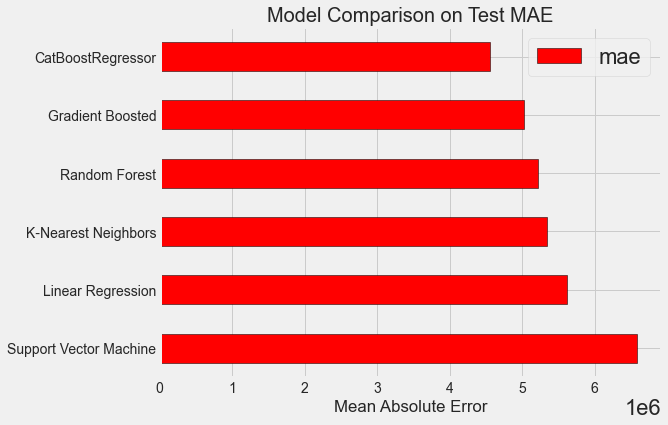

In [51]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','CatBoostRegressor'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae , mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

In [52]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [53]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [54]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


c:\Users\le\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [55]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
12,8.331351,0.165560,0.016748,0.001298,500,6,6,None,5,lad,"{'n_estimators': 500, 'min_samples_split': 6, ...",-4.606993e+06,-5.363535e+06,-4.731081e+06,-5.039195e+06,-4.935201e+06,293116.837616,1,-4.074031e+06,-3.934240e+06,-3.990146e+06,-3.907718e+06,-3.976534e+06,63669.886664
24,6.833699,0.690546,0.013251,0.006981,100,4,8,sqrt,10,lad,"{'n_estimators': 100, 'min_samples_split': 4, ...",-4.599881e+06,-5.300514e+06,-4.763303e+06,-5.126826e+06,-4.947631e+06,279080.713181,2,-3.455954e+06,-3.286296e+06,-3.470934e+06,-3.347055e+06,-3.390060e+06,76646.744803
5,21.944161,1.137141,0.045250,0.011542,900,6,8,log2,5,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-4.686365e+06,-5.329543e+06,-4.820809e+06,-5.037787e+06,-4.968626e+06,243190.036604,3,-3.835622e+06,-3.648119e+06,-3.757104e+06,-3.668092e+06,-3.727234e+06,74828.356074
13,14.289852,0.210558,0.045495,0.005599,1500,10,1,sqrt,5,lad,"{'n_estimators': 1500, 'min_samples_split': 10...",-4.585434e+06,-5.380360e+06,-4.803278e+06,-5.106108e+06,-4.968795e+06,301082.564985,4,-3.894196e+06,-3.687900e+06,-3.788342e+06,-3.715872e+06,-3.771578e+06,79720.360492
19,11.428179,0.286904,0.026750,0.005533,1100,6,2,auto,3,lad,"{'n_estimators': 1100, 'min_samples_split': 6,...",-4.636780e+06,-5.443372e+06,-4.791924e+06,-5.055344e+06,-4.981855e+06,305593.021428,5,-4.664311e+06,-4.413928e+06,-4.560656e+06,-4.416401e+06,-4.513824e+06,105249.932159
17,3.264505,0.022455,0.008988,0.001010,500,6,8,None,2,lad,"{'n_estimators': 500, 'min_samples_split': 6, ...",-4.674248e+06,-5.368185e+06,-4.858559e+06,-5.071280e+06,-4.993068e+06,258151.408535,6,-4.820065e+06,-4.570111e+06,-4.724692e+06,-4.680725e+06,-4.698898e+06,89809.540619
23,0.820530,0.011919,0.003497,0.000502,100,10,4,sqrt,3,huber,"{'n_estimators': 100, 'min_samples_split': 10,...",-4.837458e+06,-5.401201e+06,-4.847041e+06,-5.181923e+06,-5.066906e+06,237680.940847,7,-4.779323e+06,-4.564935e+06,-4.709984e+06,-4.620101e+06,-4.668586e+06,82266.225375
1,8.169403,0.429560,0.015524,0.008520,100,6,8,sqrt,10,huber,"{'n_estimators': 100, 'min_samples_split': 6, ...",-4.901759e+06,-5.434091e+06,-4.814572e+06,-5.251361e+06,-5.100446e+06,252633.759982,8,-3.097236e+06,-3.016818e+06,-3.131846e+06,-2.971608e+06,-3.054377e+06,63442.263171
9,5.765545,0.162455,0.010500,0.001499,500,4,2,auto,3,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-4.912405e+06,-5.490174e+06,-5.021855e+06,-5.300900e+06,-5.181334e+06,227724.752741,9,-4.137008e+06,-3.835324e+06,-3.981100e+06,-3.959690e+06,-3.978280e+06,107219.929842
21,9.154501,0.454993,0.019001,0.001001,500,6,4,log2,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-4.881256e+06,-5.521776e+06,-4.952567e+06,-5.387558e+06,-5.185789e+06,274194.899206,10,-3.361781e+06,-3.122346e+06,-3.374461e+06,-3.087683e+06,-3.236568e+06,132198.875577


In [56]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)

In [57]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [58]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


c:\Users\le\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=5,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 n_estimators=500,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

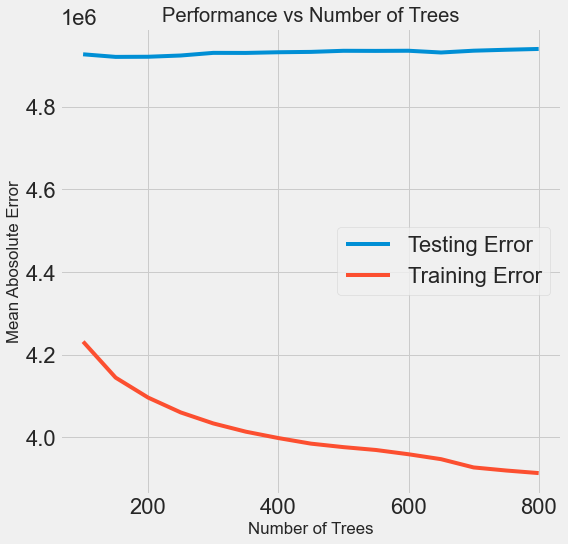

In [59]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [60]:
results.sort_values('mean_test_score', ascending = False).head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
1,4.002692,0.114865,0.005499,0.000499,150,{'n_estimators': 150},-4.603518e+06,-5.332253e+06,-4.718654e+06,-5.027428e+06,-4.920463e+06,283810.452957,1,-4.187834e+06,-4.148777e+06,-4.169207e+06,-4.072699e+06,-4.144629e+06,43765.948545
2,3.837741,0.153007,0.009500,0.001806,200,{'n_estimators': 200},-4.606654e+06,-5.331352e+06,-4.724002e+06,-5.021159e+06,-4.920792e+06,281088.187223,2,-4.156581e+06,-4.068457e+06,-4.127021e+06,-4.033102e+06,-4.096290e+06,48339.485764
3,4.571556,0.143594,0.009748,0.001916,250,{'n_estimators': 250},-4.614524e+06,-5.325225e+06,-4.728503e+06,-5.027025e+06,-4.923819e+06,276401.156238,3,-4.118148e+06,-4.034214e+06,-4.091280e+06,-3.998158e+06,-4.060450e+06,47032.521338
0,2.938733,0.088320,0.005249,0.001090,100,{'n_estimators': 100},-4.583711e+06,-5.361647e+06,-4.730485e+06,-5.031120e+06,-4.926741e+06,298422.698728,4,-4.255383e+06,-4.214197e+06,-4.254321e+06,-4.202969e+06,-4.231718e+06,23475.781885
5,5.759418,0.095541,0.012000,0.001869,350,{'n_estimators': 350},-4.612369e+06,-5.347525e+06,-4.734234e+06,-5.026088e+06,-4.930054e+06,284065.979590,5,-4.092191e+06,-3.981665e+06,-4.025699e+06,-3.956085e+06,-4.013910e+06,51600.111508


From this plot, it's pretty clear that our model is overfitting! The training error is significantly lower than the testing error, which shows that the model is learning the training data very well but then is not able to generalize to the test data as well. Moveover, as the number of trees increases, the amount of overfitting increases. Both the test and training error decrease as the number of trees increase but the training error decreases more rapidly.

In [61]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=150,
                          random_state=42)

In [62]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)


546 ms ± 112 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [63]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

c:\Users\le\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
c:\Users\le\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
c:\Users\le\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
c:\Users\le\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
c:\Users\le\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will b

2 s ± 89.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [64]:
default_pred = default_model.predict(X_test)
print('Default model performance on the test set: MAE = %0.4f.' % mean_absolute_error(y_test, default_pred))

Default model performance on the test set: MAE = 5016059.0685.


In [65]:

final_pred = final_model.predict(X_test)
print('Final model performance on the test set:   MAE = %0.4f.' % mean_absolute_error(y_test, final_pred))

Final model performance on the test set:   MAE = 4494824.7930.


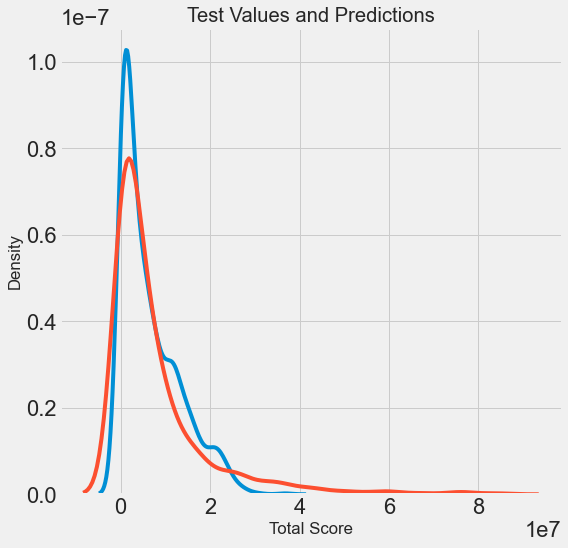

In [66]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Total Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

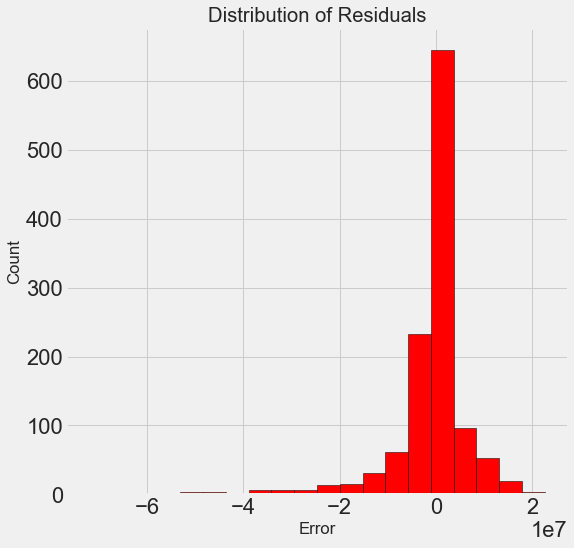

In [67]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

In [68]:
test_preds = ct.predict(test[cols])

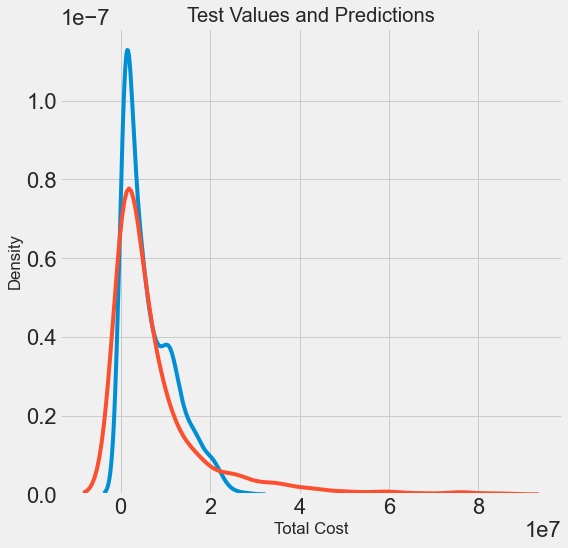

In [69]:
# Density plot of the final predictions and the test values
sns.kdeplot(preds, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Total Cost'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

In [70]:
# Feature importance
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train[cols].columns), 
                                'importance': final_model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,tour_arrangement,0.328970
1,total_nights_spent,0.219409
2,country,0.079870
3,total_persons,0.064028
4,night_mainland,0.053086
5,purpose,0.051247
6,night_zanzibar,0.042852
7,main_activity,0.034075
8,info_source,0.026878
9,age_group,0.026399


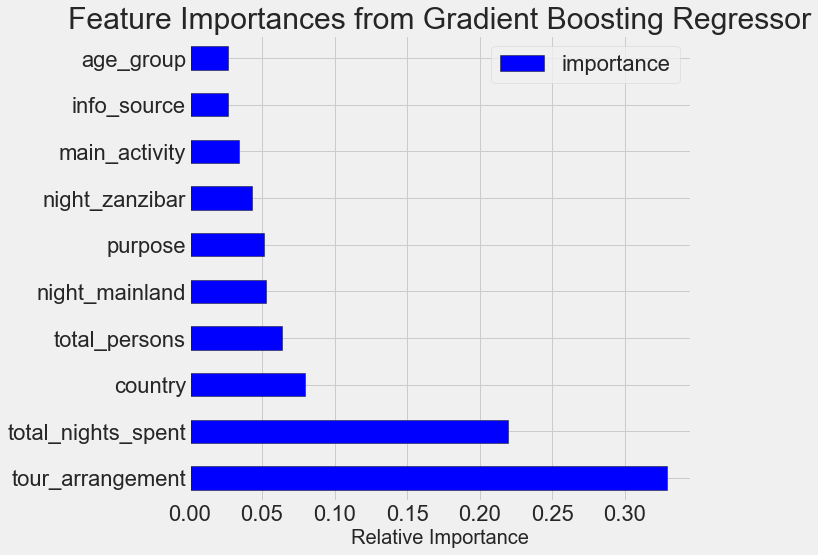

In [71]:
#figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Gradient Boosting Regressor', size = 30);

In [72]:
# Feature importance
# Extract the feature importances into a dataframe
ctfeature_results = pd.DataFrame({'feature': list(train[cols].columns), 
                                'importance': ct.feature_importances_})

# Show the top 10 most important
ctfeature_results = ctfeature_results.sort_values('importance', ascending = False).reset_index(drop=True)

ctfeature_results.head(10)

,feature,importance
0,tour_arrangement,11.776016
1,country,9.794129
2,total_persons,8.849946
3,age_group,8.799485
4,total_nights_spent,7.683338
5,night_zanzibar,7.095657
6,main_activity,6.723825
7,night_mainland,6.422725
8,travel_with,5.794163
9,total_female,5.471127


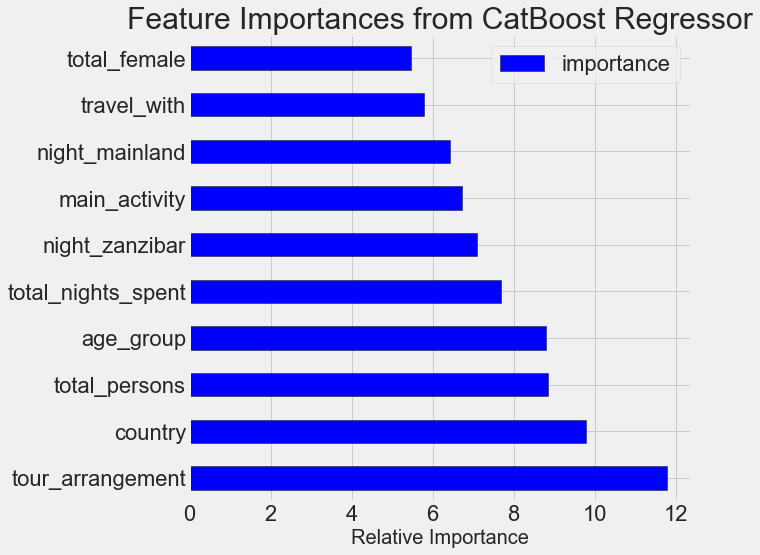

In [73]:
#figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
ctfeature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from CatBoost Regressor', size = 30);

In [74]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(train[cols].columns).index(x) for x in most_important_features]

# Keep only the most important features
X_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (3606, 10)
Most important testing  features shape:  (1202, 10)


In [75]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(X_train, y_train)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features
lr.fit(X_reduced, y_train)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mean_absolute_error(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mean_absolute_error(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    5618619.4723.
Linear Regression Reduced Results: MAE = 5619769.7016.


Well, reducing the features did not improve the linear regression results! It turns out that the extra information in the features with low importance do actually improve performance.

In [76]:
# Extract the names of the most important features
most_important_features = ctfeature_results['feature']

# Find the index that corresponds to each feature name
indices = [list(train[cols].columns).index(x) for x in most_important_features]

# Keep only the most important features
X_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (3606, 15)
Most important testing  features shape:  (1202, 15)


In [77]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(X_train, y_train)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features
lr.fit(X_reduced, y_train)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mean_absolute_error(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mean_absolute_error(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    5618619.4723.
Linear Regression Reduced Results: MAE = 5618619.4723.


XGBoost Features improve the Linear Regression results

In [78]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y_train)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mean_absolute_error(y_test, model_reduced_pred))

c:\Users\le\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


Gradient Boosted Reduced Results: MAE = 4543209.1375


In [79]:
#Gradient Boosting Regressor final 

final_pred

# Find the residuals
residuals = abs(final_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test[np.argmax(residuals), :]
right = X_test[np.argmin(residuals), :]

In [80]:
# LIME for explaining predictions
import lime 
import lime.lime_tabular

In [81]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train, 
                                                   mode = 'regression',
                                                   training_labels = y_train,
                                                   feature_names = list(most_important_features))

Prediction: 10881969.7493
Actual Value: 82875000.0000


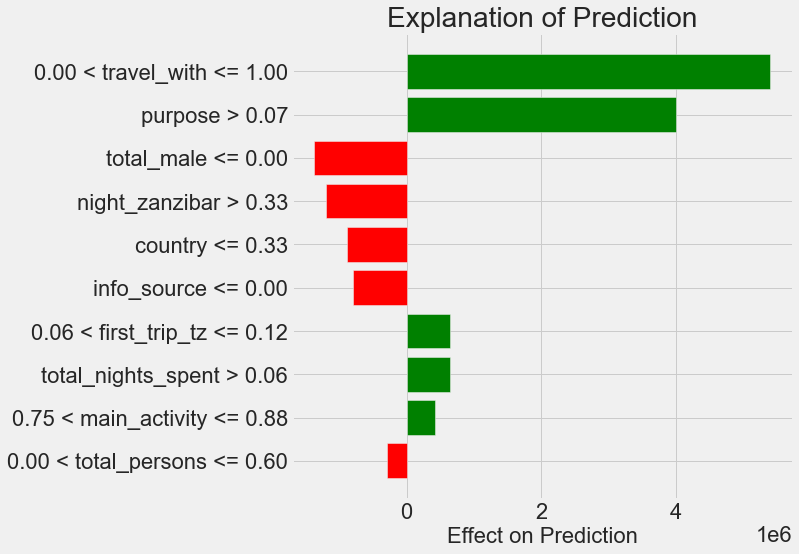

In [82]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % final_model.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = final_model.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [83]:
wrong_exp.show_in_notebook(show_predicted_value=False)

Prediction: 680193.8504
Actual Value: 680799.0000


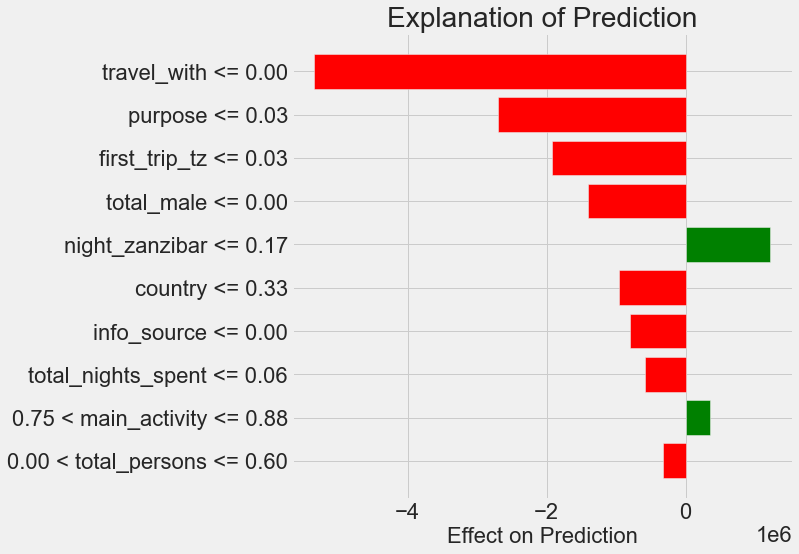

In [84]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % final_model.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, final_model.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

Prediction: 10549929.8792
Actual Value: 82875000.0000


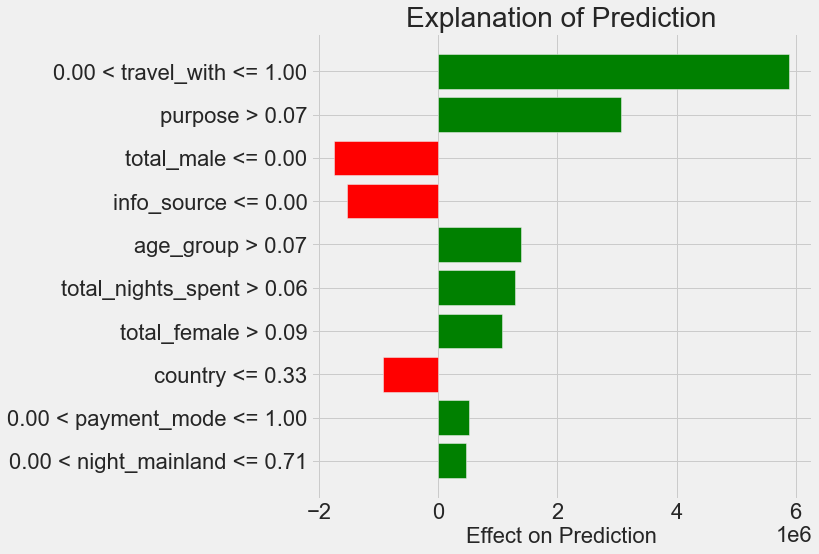

In [85]:
# CATBOOST REGRESSOR FINAL
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % ct.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = ct.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

Prediction: 579680.8013
Actual Value: 680799.0000


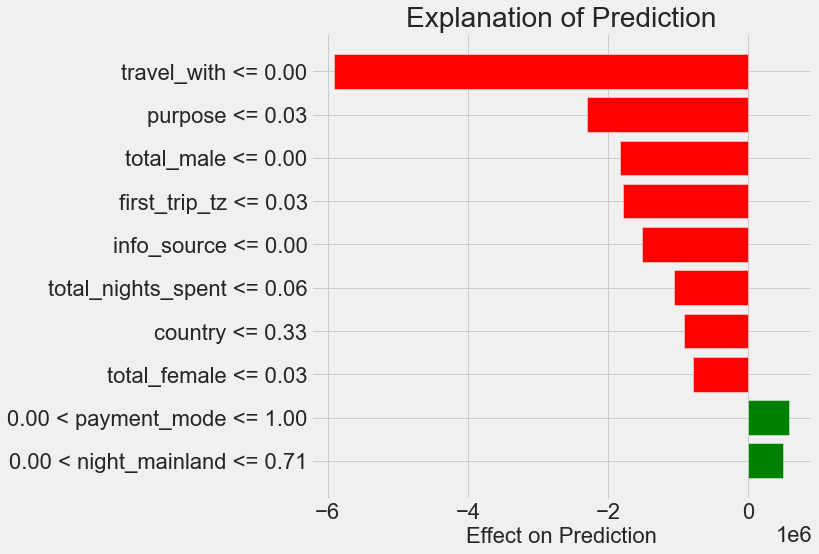

In [86]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % ct.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, ct.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [87]:
# save the models to disk 
import joblib 
filename_01  = 'gradient_boosting_regressor_model.sav'
filename_02 ='catboost_regressor_model.sav'

joblib.dump(final_model, filename_01)
joblib.dump(ct, filename_02)

['catboost_regressor_model.sav']